In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import warnings
import string
from skopt.space import Real, Categorical, Integer
warnings.filterwarnings("ignore")

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Tools and metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from skopt import BayesSearchCV


In [2]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
train=pd.read_csv('train-1.csv')
test =pd.read_csv('test-1.csv')

In [4]:
# Response label
response = 'price'
predictors =  [variable for variable in train.columns if variable!=response] 

In [5]:
y_train = train[response]
X_train = train[predictors] 

# Exploratory Data Analysis

In [6]:
train.describe()

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.063500e+04,10635.000000,10635.000000,10635.000000,10635.000000,10635.000000,10632.000000,10627.000000,10562.000000,56.000000,...,7733.000000,7722.000000,7732.000000,7723.000000,7723.000000,10635.000000,10635.000000,10635.000000,10635.000000,8042.000000
mean,8.794012e+07,9.384015,9.384015,-33.862593,151.204000,3.614104,1.383230,1.642797,2.072808,351.660714,...,9.248028,9.730251,9.724780,9.726272,9.313997,8.107193,7.309450,0.705219,0.031218,1.157101
std,8.986642e+07,29.820464,29.820464,0.072832,0.083711,2.259294,0.722098,1.100624,1.549579,642.300985,...,1.202057,0.780138,0.816364,0.723790,1.031714,23.913682,23.904476,2.149414,0.671264,1.513692
min,1.503000e+04,0.000000,0.000000,-34.092550,150.653750,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.626570e+07,1.000000,1.000000,-33.897430,151.180775,2.000000,1.000000,1.000000,1.000000,0.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,4.995002e+07,1.000000,1.000000,-33.881130,151.214420,3.000000,1.000000,1.000000,2.000000,0.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.550000
75%,1.419580e+08,3.000000,3.000000,-33.832085,151.260870,4.000000,2.000000,2.000000,3.000000,422.500000,...,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.000000,1.000000,0.000000,1.630000
max,3.359250e+08,381.000000,381.000000,-33.399990,151.339810,16.000000,18.000000,16.000000,26.000000,2928.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,174.000000,174.000000,34.000000,31.000000,13.760000


In [7]:
train['price'].head()

0     $74.00
1     $63.00
2    $176.00
3    $195.00
4     $51.00
Name: price, dtype: object

In [8]:
train_1=train.copy()
test_1=test.copy()
train['price']=train['price'].str.replace('[{}]'.format(string.punctuation), '')
train['price']=train['price'].map(lambda x: str(x)[:-2]).astype(int)
y_train=train['price']

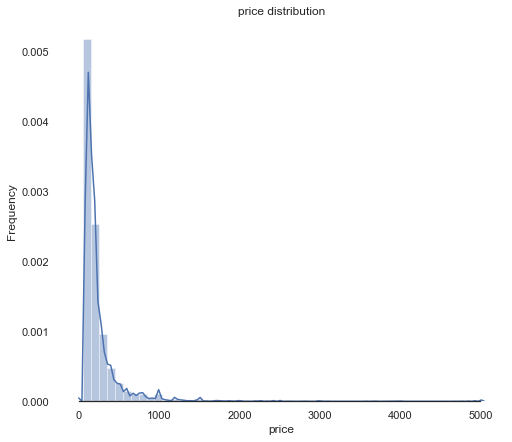

In [9]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(y_train, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="price")
ax.set(title="price distribution")
sns.despine(trim=True, left=True)
plt.show()

In [10]:
# Skew and kurt
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 5.661448
Kurtosis: 51.660615


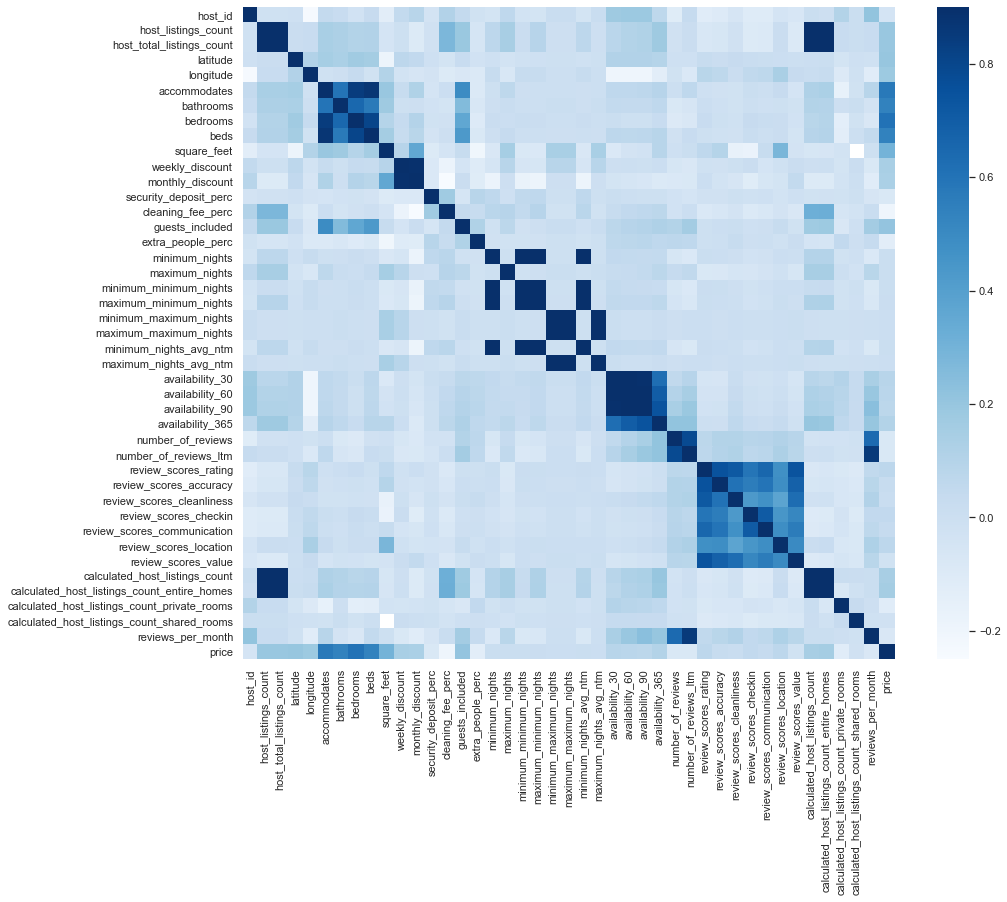

In [11]:
train['price'] = y_train
corr = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


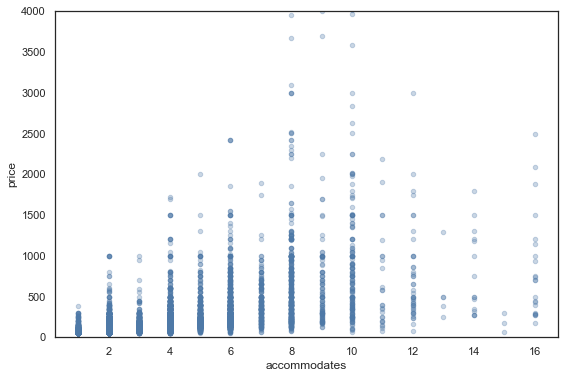

In [12]:
data = pd.concat([train['price'], train_1['accommodates']], axis=1)
data.plot.scatter(x='accommodates', y='price', alpha=0.3, ylim=(0,4000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


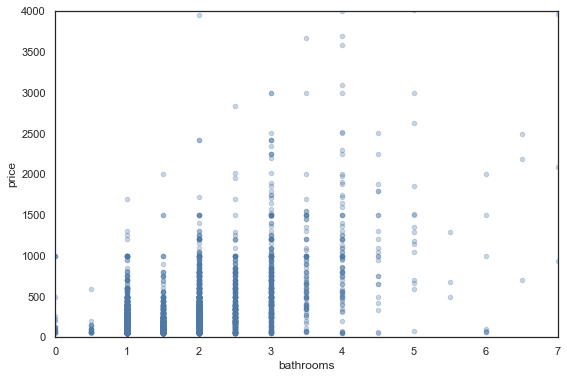

In [13]:
data = pd.concat([train['price'], train_1['bathrooms']], axis=1)
data.plot.scatter(x='bathrooms', y='price', alpha=0.3,xlim=(0,7), ylim=(0,4000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


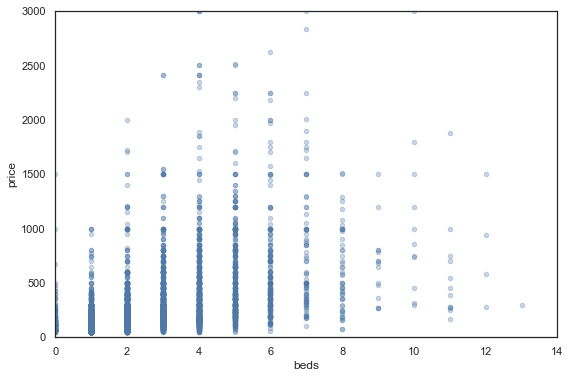

In [14]:
data = pd.concat([train['price'], train_1['beds']], axis=1)
data.plot.scatter(x='beds', y='price', alpha=0.3,xlim=(0,14), ylim=(0,3000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


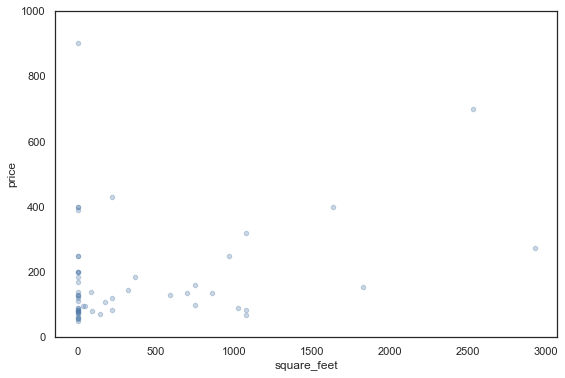

In [15]:
data = pd.concat([train['price'], train_1['square_feet']], axis=1)
data.plot.scatter(x='square_feet', y='price', alpha=0.3, ylim=(0,1000));

# Feature Engineering

## Predictor transoformation

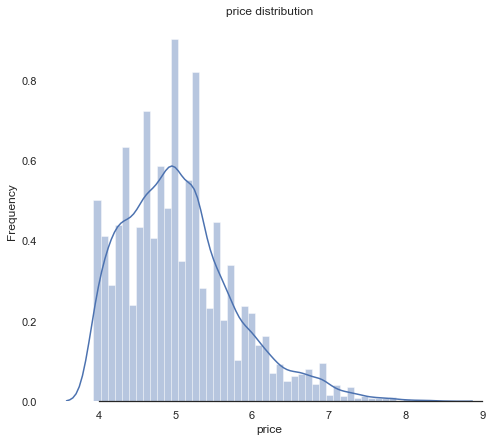

In [16]:
log_y_train=np.log(y_train)
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(log_y_train, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="price")
ax.set(title="price distribution")
sns.despine(trim=True, left=True)
plt.show()

In [17]:
# Skew and kurt
print("Skewness: %f" % log_y_train.skew())
print("Kurtosis: %f" % log_y_train.kurt())

Skewness: 0.875109
Kurtosis: 0.890887


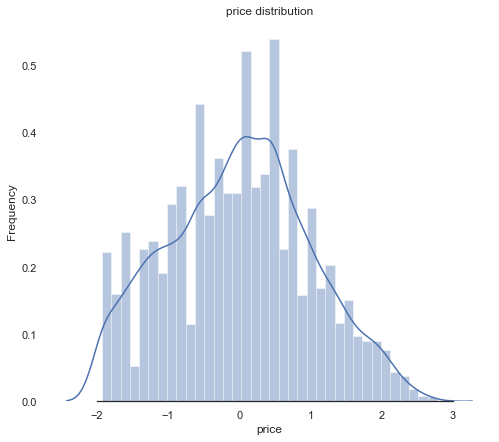

In [18]:
yeoj = PowerTransformer(method='yeo-johnson')
yj_y_train = y_train.copy()
yeoj.fit(yj_y_train.to_frame())
yj_y_train=yeoj.transform(yj_y_train.to_frame())

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(yj_y_train, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="price")
ax.set(title="price distribution")
sns.despine(trim=True, left=True)
plt.show()

In [19]:
# Skew and kurt
print("Skewness: %f" % pd.DataFrame(yj_y_train).skew())
print("Kurtosis: %f" % pd.DataFrame(yj_y_train).kurt())

Skewness: 0.060801
Kurtosis: -0.572157


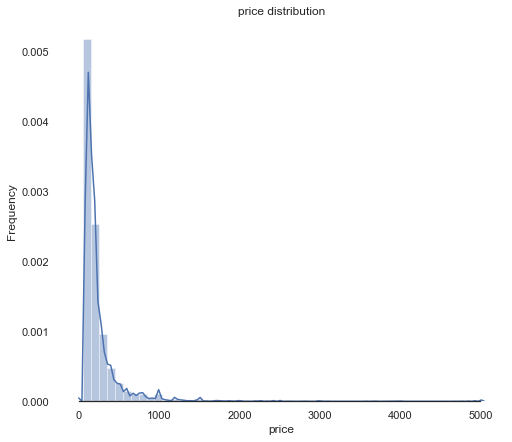

In [20]:
y1=yeoj.inverse_transform(yj_y_train)

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(y1, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="price")
ax.set(title="price distribution")
sns.despine(trim=True, left=True)
plt.show()

In [21]:
# Skew and kurt
print("Skewness: %f" % pd.DataFrame(y1).skew())
print("Kurtosis: %f" % pd.DataFrame(y1).kurt())

Skewness: 5.661448
Kurtosis: 51.660615


## Missing Value

In [22]:
missing=train.isnull().sum()
missing[train.isnull().sum()!=0].sort_values()

bathrooms                          3
bedrooms                           8
host_location                     12
city                              15
zipcode                           36
beds                              73
neighbourhood                   1400
cleaning_fee_perc               2510
last_review                     2593
first_review                    2593
reviews_per_month               2593
space                           2842
review_scores_rating            2895
review_scores_cleanliness       2902
review_scores_communication     2903
review_scores_accuracy          2909
review_scores_location          2912
review_scores_value             2912
review_scores_checkin           2913
host_neighbourhood              3189
host_acceptance_rate            3440
security_deposit_perc           3451
transit                         3539
neighborhood_overview           3662
interaction                     4074
house_rules                     4443
host_response_rate              4472
h

In [23]:
missing=test.isnull().sum()
missing[test.isnull().sum()!=0].sort_values()

bathrooms                          6
bedrooms                          12
city                              16
host_location                     26
zipcode                           79
beds                             164
neighbourhood                   3135
cleaning_fee_perc               5833
last_review                     6172
first_review                    6172
reviews_per_month               6172
space                           6568
review_scores_rating            6877
review_scores_cleanliness       6889
review_scores_communication     6892
review_scores_accuracy          6898
review_scores_location          6906
review_scores_checkin           6907
review_scores_value             6912
host_neighbourhood              7325
security_deposit_perc           7925
host_acceptance_rate            8018
transit                         8263
neighborhood_overview           8515
interaction                     9591
house_rules                    10241
host_response_rate             10424
h

In [24]:
# there are only 10635 obeservation, if the null value more than 1/3, i wll drop the predictor.
# i.e. if value>3000 and meaning less

In [25]:
fill_median=['review_scores_rating','review_scores_cleanliness','review_scores_communication',
            'review_scores_accuracy','review_scores_location','review_scores_value','review_scores_checkin']

In [26]:
for i in fill_median:
    train[i].fillna(train[i].median(),inplace=True)
    test[i].fillna(train[i].median(),inplace=True)

In [27]:
fill_0=['security_deposit_perc','cleaning_fee_perc','reviews_per_month']
for i in fill_0:
    train[i].fillna(0,inplace=True)
    test[i].fillna(0,inplace=True)

In [28]:
missing=test.isnull().sum()
missing[test.isnull().sum()!=0].sort_values()

bathrooms                    6
bedrooms                    12
city                        16
host_location               26
zipcode                     79
beds                       164
neighbourhood             3135
last_review               6172
first_review              6172
space                     6568
host_neighbourhood        7325
host_acceptance_rate      8018
transit                   8263
neighborhood_overview     8515
interaction               9591
house_rules              10241
host_response_rate       10424
host_response_time       10424
access                   10576
host_about               11230
notes                    14367
weekly_discount          22864
monthly_discount         23645
square_feet              24700
dtype: int64

In [29]:
drop_value=['zipcode','beds','neighbourhood','cleaning_fee_perc','last_review','first_review',
            'host_neighbourhood','host_acceptance_rate','host_response_time','access','host_about',
            'notes','weekly_discount','monthly_discount','square_feet','host_location','space','transit',
            'neighborhood_overview','interaction','house_rules','host_response_rate']

In [30]:
predictors=train.columns

### bedrooms

In [31]:
train[train['bedrooms'].isnull()]['room_type'] #both 216 and 1038 are private room, bedrooms=1

213      Entire home/apt
216         Private room
1038        Private room
1401     Entire home/apt
7283     Entire home/apt
8264     Entire home/apt
9586     Entire home/apt
10365    Entire home/apt
Name: room_type, dtype: object

In [32]:
train[train['bedrooms'].isnull()]['beds'] #others, bedrooms=1

213      1.0
216      NaN
1038     4.0
1401     1.0
7283     NaN
8264     NaN
9586     1.0
10365    1.0
Name: beds, dtype: float64

In [33]:
train.loc[train['bedrooms'].isnull(), 'bedrooms'] = 1
test.loc[test['bedrooms'].isnull(), 'bedrooms'] = 1

### bathrooms

In [34]:
train[train['bathrooms'].isnull()]['bedrooms']

853     2.0
1038    1.0
4491    1.0
Name: bedrooms, dtype: float64

In [35]:
train[train['bathrooms'].isnull()]['room_type'] 

853     Entire home/apt
1038       Private room
4491       Private room
Name: room_type, dtype: object

In [36]:
train.loc[train['bedrooms']==2,'bathrooms'].mean()

1.3967633928571428

In [37]:
# since 1038 and 4491 are private room -> bathrooms=1, 
# 853 bathrooms->1.5

In [38]:
train.loc[853,'bathrooms']=1.5
train.loc[1038,'bathrooms']=1
train.loc[4491,'bathrooms']=1

In [39]:
# test
test[test['bathrooms'].isnull()]['bedrooms']

7396     1.0
9162     1.0
9255     1.0
10001    1.0
16192    3.0
19713    1.0
Name: bedrooms, dtype: float64

In [40]:
test[test['bathrooms'].isnull()]['room_type'] 

7396        Private room
9162        Private room
9255     Entire home/apt
10001        Shared room
16192    Entire home/apt
19713       Private room
Name: room_type, dtype: object

In [41]:
test.loc[test['bedrooms']==3,'bathrooms'].mean()

1.868322203672788

In [42]:
test.loc[7396,'bathrooms']=1
test.loc[9162,'bathrooms']=1
test.loc[9255,'bathrooms']=1
test.loc[10001,'bathrooms']=1
test.loc[16192,'bathrooms']=2
test.loc[19713,'bathrooms']=1

### host_location

In [43]:
train['host_location'].value_counts()

Sydney, New South Wales, Australia         3816
AU                                         1404
New South Wales, Australia                 1186
Bondi Beach, New South Wales, Australia     258
Australia                                   227
                                           ... 
Eastern suburbs in Sydney                     1
Weipa, Queensland, Australia                  1
Thornleigh, New South Wales, Australia        1
Everton Park, Queensland, Australia           1
Wyoming, New South Wales, Australia           1
Name: host_location, Length: 795, dtype: int64

In [44]:
# I will delete this, high correlated with city

### city

In [45]:
train['city'].value_counts()

Bondi Beach          552
Surry Hills          372
Manly                358
Sydney               333
Bondi                284
                    ... 
Eastgardens            1
Surry Hills            1
Silverwater            1
Bronte, Sydney         1
Constitution Hill      1
Name: city, Length: 545, dtype: int64

In [46]:
train[train['city'].isnull()]['host_location']

138      Vaucluse, New South Wales, Australia
575               Barcelona, Catalonia, Spain
953                New South Wales, Australia
1695     Clovelly, New South Wales, Australia
1865       Sydney, New South Wales, Australia
2587      Wellington, Wellington, New Zealand
2870               New South Wales, Australia
4420       Sydney, New South Wales, Australia
4481        Bondi, New South Wales, Australia
4641       Sydney, New South Wales, Australia
6279                                       AU
7366     Ashfield, New South Wales, Australia
7534       Sydney, New South Wales, Australia
10201              New South Wales, Australia
10390      Sydney, New South Wales, Australia
Name: host_location, dtype: object

In [47]:
train.loc[138,'city']='Vaucluse'
train.loc[1695,'city']='Clovelly'
train.loc[1865,'city']='Sydney'
train.loc[2587,'city']='Wellington'
train.loc[4420,'city']='Sydney'
train.loc[4481,'city']='Bondi'
train.loc[4641,'city']='Sydney'
train.loc[7366,'city']='Ashfield'
train.loc[7534,'city']='Sydney'
train.loc[10390,'city']='Sydney'

train.loc[575,'city']='Others'
train.loc[953,'city']='Others'
train.loc[2870,'city']='Others'
train.loc[6279,'city']='Others'
train.loc[10201,'city']='Others'

In [48]:
# counts = train['city'].value_counts() 
# level_50 = []
# for level in counts.index:
#     if counts[level] < 50:
#         level_50.append(level)
        
# for level in level_50:
#     train.loc[train['city']==level,'city'] = 'Others'

In [49]:
test[test['city'].isnull()]['host_location']

963       Clovelly, New South Wales, Australia
1519        Sydney, New South Wales, Australia
2114      Rosebery, New South Wales, Australia
3895                New South Wales, Australia
6350                New South Wales, Australia
8477     Mona Vale, New South Wales, Australia
9074           London, England, United Kingdom
14112       Sydney, New South Wales, Australia
14170               New South Wales, Australia
14756               New South Wales, Australia
15516               New South Wales, Australia
21220       Sydney, New South Wales, Australia
21617       Sydney, New South Wales, Australia
22436       Sydney, New South Wales, Australia
22502          London, England, United Kingdom
22986       Sydney, New South Wales, Australia
Name: host_location, dtype: object

In [50]:
test.loc[963,'city']='Clovelly'
test.loc[1519,'city']='Sydney'
test.loc[2114,'city']='Rosebery'
test.loc[3895,'city']='Others'
test.loc[6350,'city']='Others'
test.loc[8477,'city']='Mona Vale'
test.loc[9074,'city']='London'
test.loc[14112,'city']='Sydney'
test.loc[14170,'city']='Others'
test.loc[14756,'city']='Others'
test.loc[15516,'city']='Others'
test.loc[21220,'city']='Sydney'
test.loc[21617,'city']='Sydney'
test.loc[22436,'city']='Sydney'
test.loc[22502,'city']='London'
test.loc[22986,'city']='Sydney'

# categorical var

In [51]:
train_1=train.copy()
test_1=test.copy()
train_1=train_1.drop(drop_value, axis=1)
test_1=test_1.drop(drop_value, axis=1)

In [52]:
# summary and description are same -> drop one
# experiences_offered are none for all observations -> drop
# requires_license & is_business_travel_ready are 'f' for all -> drop

drop_col=['experiences_offered','requires_license','is_business_travel_ready']
train_1 = train_1.drop(drop_col, axis= 1)
test_1 = test_1.drop(drop_col, axis= 1)

In [53]:
object=train_1.select_dtypes(include=['category','object'])
object=test_1.select_dtypes(include=['category','object'])

In [54]:
for col in object.columns:
    print(col)
    print(train_1[col].unique())
    print('\n')

name
['Brand New House with Private Bathroom Miranda'
 'Single bedroom apartment in heart of Randwick'
 'Couples stylish retreat 10 mins to Sydney  city' ...
 'Comfy Private Room Close to City and Airport' 'Stone’s Throw - Bondi'
 '2-bedroom unit in quiet neighbourhood']


summary
['New house built in (Phone number hidden by Airbnb) m to Westfield Miranda and 15 mins walk to Miranda train station.'
 'Furnished, single bedroom apartment, Bedroom, living area, kitchen and bathroom can be used by gustes'
 'Stylish Victorian terrace. 1 king size bed and bedroom, cosy lounge room with gas coal fireplace, Foxtel & Netficks in the lounge, dining area kitchen.  laundry/ dryer, covered outside deck BBQ. Private bathroom. Table chairs on front to watch sun sunset. Sun all day on back terrace.'
 ...
 'The apartment is located in Zetland, with several beautiful parks right next to steps. It is very easy to get around: - Sydney Airport: 10-15 mins by train - CBD: 10 mins by train (Pitt St, Town Hal

In [55]:
cate_tf=['host_is_superhost','host_identity_verified','is_location_exact','instant_bookable',
         'require_guest_profile_picture','require_guest_phone_verification']

In [56]:
train_1.columns

Index(['name', 'summary', 'description', 'host_id', 'host_since',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'city', 'smart_location', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'bed_type', 'amenities',
       'security_deposit_perc', 'guests_included', 'extra_people_perc',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communicatio

In [57]:
# create dummy variable for cate_tf categories
dummies_1=pd.get_dummies(train_1[cate_tf], drop_first=True)
dummies_2=pd.get_dummies(test_1[cate_tf], drop_first=True)

for i in dummies_1.columns:
    train_1=train_1.join(dummies_1[i])
    test_1=test_1.join(dummies_2[i])

for i in cate_tf:
    train_1 = train_1.drop(i, axis= 1)
    test_1 = test_1.drop(i, axis= 1)

In [58]:
##############
dummies = pd.get_dummies(train_1['room_type'], drop_first=False)
train_1 = train_1.join(dummies)
train_1 = train_1.drop('room_type', axis= 1)

dummies = pd.get_dummies(train_1['bed_type'], drop_first=False)
train_1 = train_1.join(dummies)
train_1 = train_1.drop('bed_type', axis= 1)

dummies = pd.get_dummies(train_1['cancellation_policy'], drop_first=False)
train_1 = train_1.join(dummies)
train_1 = train_1.drop('cancellation_policy', axis= 1)

dummies = pd.get_dummies(test_1['room_type'], drop_first=False)
test_1 = test_1.join(dummies)
test_1 = test_1.drop('room_type', axis= 1)

dummies = pd.get_dummies(test_1['bed_type'], drop_first=False)
test_1 = test_1.join(dummies)
test_1 = test_1.drop('bed_type', axis= 1)
test_1 = test_1.drop('Airbed', axis=1)

dummies = pd.get_dummies(test_1['cancellation_policy'], drop_first=False)
test_1 = test_1.join(dummies)
test_1 = test_1.drop('cancellation_policy', axis= 1)
test_1 = test_1.drop('luxury_no_refund', axis=1)
test_1 = test_1.drop('strict', axis=1)

In [59]:
train_1.loc[train_1['property_type']=='Boat','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Camper/RV','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Aparthotel','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Farm stay','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Earth house','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Island','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Heritage hotel (India)','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Castle','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Yurt','property_type'] = 'Others'
train_1.loc[train_1['property_type']=='Train','property_type'] = 'Others'

test_1.loc[test_1['property_type']=='Boat','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Camper/RV','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Tent','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Farm stay','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Aparthotel','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Chalet','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Barn','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Earth house','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Island','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Campsite','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Treehouse','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Resort','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Plane','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Cave','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Bus','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Yurt','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Casa particular (Cuba)','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Dome house ','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Hut','property_type'] = 'Others'
test_1.loc[test_1['property_type']=='Dome house','property_type'] = 'Others'

In [60]:
##########
dummies = pd.get_dummies(train_1['property_type'], drop_first=False)
train_1 = train_1.join(dummies)
train_1 = train_1.drop('property_type', axis= 1)

dummies = pd.get_dummies(test_1['property_type'], drop_first=False)
test_1 = test_1.join(dummies)
test_1 = test_1.drop('property_type', axis= 1)

In [61]:
train_1.select_dtypes(include=['object'])

,name,summary,description,host_since,host_verifications,street,neighbourhood_cleansed,city,smart_location,amenities
0,Brand New House with Private Bathroom Miranda,New house built in (Phone number hidden by Air...,New house built in (Phone number hidden by Air...,2015-12-05,"['email', 'phone', 'jumio', 'offline_governmen...","Miranda, NSW, Australia",Sutherland Shire,Miranda,"Miranda, Australia","{TV,Kitchen,""Free parking on premises"",Breakfa..."
1,Single bedroom apartment in heart of Randwick,"Furnished, single bedroom apartment, Bedroom, ...","Furnished, single bedroom apartment, Bedroom, ...",2017-03-15,"['email', 'phone']","Randwick, NSW, Australia",Randwick,Randwick,"Randwick, Australia","{Kitchen,Heating,Washer,Dryer,""Smoke detector""..."
2,Couples stylish retreat 10 mins to Sydney city,Stylish Victorian terrace. 1 king size bed and...,Stylish Victorian terrace. 1 king size bed and...,2015-06-08,"['email', 'phone', 'reviews', 'jumio', 'offlin...","Stanmore, NSW, Australia",Marrickville,Stanmore,"Stanmore, Australia","{TV,Wifi,""Air conditioning"",Kitchen,Breakfast,..."
3,Manly Retreat with Sweeping Harbour Views,This stunning coastal retreat is a few metres ...,This stunning coastal retreat is a few metres ...,2017-02-08,"['email', 'phone', 'reviews']","Fairlight (Manly), NSW, Australia",Manly,Fairlight (Manly),"Fairlight (Manly), Australia","{TV,Internet,Wifi,Kitchen,""Free parking on pre..."
4,Cozy bedroom just 5 min walking to Dee Why beach,"Our place is a cozy and light apartment, just ...","Our place is a cozy and light apartment, just ...",2015-01-06,"['email', 'phone', 'facebook', 'reviews']","Dee Why, NSW, Australia",Warringah,Dee Why,"Dee Why, Australia","{TV,Wifi,Kitchen,Breakfast,Heating,""Family/kid..."
...,...,...,...,...,...,...,...,...,...,...
10630,Cosy Beach Apartment,This newly refurbished 2 bedroom apartment is ...,This newly refurbished 2 bedroom apartment is ...,2016-12-12,"['email', 'phone', 'facebook', 'reviews', 'jum...","Bondi Beach, NSW, Australia",Waverley,Bondi Beach,"Bondi Beach, Australia","{TV,Wifi,Kitchen,""Suitable for events"",Washer,..."
10631,Large sunny ensuite bedroom,Beautiful large apartment with your own privat...,Beautiful large apartment with your own privat...,2013-11-13,"['email', 'phone', 'reviews', 'jumio', 'govern...","Bondi, NSW, Australia",Waverley,Bondi,"Bondi, Australia","{TV,Wifi,Pool,Kitchen,Elevator,""Buzzer/wireles..."
10632,Comfy Private Room Close to City and Airport,"The apartment is located in Zetland, with seve...","The apartment is located in Zetland, with seve...",2015-09-04,"['email', 'phone', 'facebook', 'reviews', 'jum...","Zetland, NSW, Australia",Sydney,Zetland,"Zetland, Australia","{TV,Wifi,Kitchen,Washer,Dryer,""Smoke detector""..."
10633,Stone’s Throw - Bondi,The 2 bedroom apartment is light and bright an...,The 2 bedroom apartment is light and bright an...,2016-04-25,"['phone', 'jumio', 'offline_government_id', 's...","Bondi Beach, NSW, Australia",Waverley,Bondi Beach,"Bondi Beach, Australia","{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d..."


# Model Building

In [62]:
drop_col=['host_id','name','summary','description','host_since','host_verifications','street','neighbourhood_cleansed','city','smart_location','amenities']
train_1 = train_1.drop(drop_col, axis= 1)
test_1 = test_1.drop(drop_col, axis= 1)

In [63]:
train_1['price']=yj_y_train
yj_y_train=train_1['price']

In [64]:
X_train = train_1.drop('price',axis=1)
X_test=test_1

In [65]:
X_train.shape

(10635, 76)

In [66]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=1, shuffle=True)

# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, yj_y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

## OLS

In [67]:
ols = LinearRegression()
ols_data = ols.fit(X_train,yj_y_train)
ols.fit(X_train,yj_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

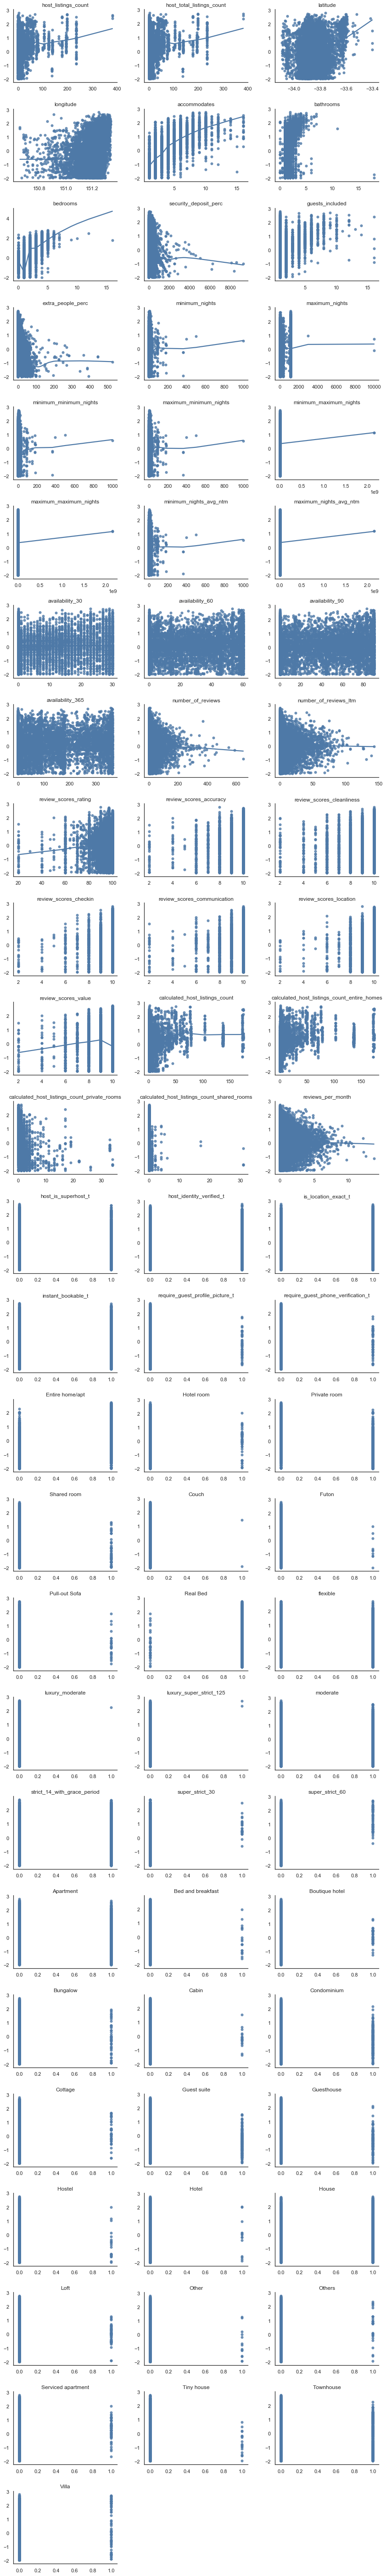

In [68]:
from statlearning import plot_regressions
plot_regressions(X_train, yj_y_train, lowess=True)
plt.show(block=False)

## Random forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr_data = regr.fit(X_train, yj_y_train)
regr.fit(X_train, yj_y_train)
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
scores = {}

score = cv_rmse(regr)
print("random forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['regr'] = (score.mean(), score.std())

random forest: 0.5242 (0.0202)


In [71]:
%%time

tuning_parameters = {
    'n_estimators' : [200],
     'max_depth' :[16],
     'min_samples_split' :[8],
    'min_samples_leaf' :[4]
}


rf = GridSearchCV(regr, tuning_parameters, cv = 5, n_jobs=4) #n_iter = 32,
rf_full_data = rf.fit(X_train, list(yj_y_train))
rf.fit(X_train, yj_y_train)

print('Best parameters found by grid search:', rf.best_params_, '\n')

Best parameters found by grid search: {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200} 

Wall time: 2min 34s


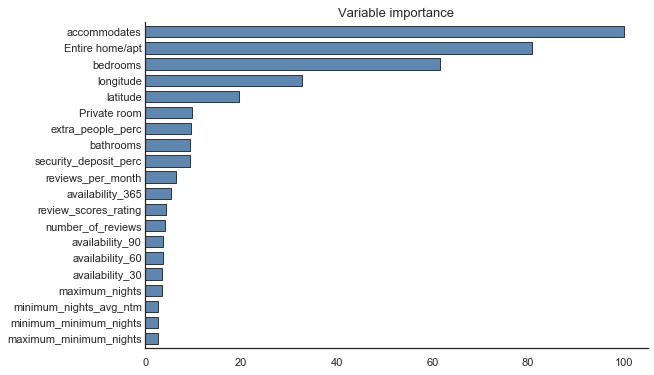

In [72]:
from statlearning import plot_feature_importance
plot_feature_importance(regr, X_train.columns)
plt.show()

In [73]:
score = cv_rmse(rf)
print("random forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

random forest: 0.5243 (0.0189)


## XGBoost

In [74]:
import xgboost as xgb

xbst = xgb.XGBRegressor(reg_lambda=0,
                       objective='reg:squarederror')
xbst_data = xbst.fit(X_train, yj_y_train)
xbst.fit(X_train, yj_y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [75]:
score = cv_rmse(xbst)
print("XGboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xbst'] = (score.mean(), score.std())

XGboost: 0.5140 (0.0183)


In [76]:
%%time

model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0)

tuning_parameters = {
    'learning_rate': [0.1],
    'n_estimators' : [250],
    'max_depth' : [5],
    'subsample' : [0.8]
}

xbst = GridSearchCV(model, tuning_parameters, cv = 5, n_jobs=4)
xbst_full_data = xbst.fit(X_train, yj_y_train)

print('Best parameters found by grid search:', xbst.best_params_, '\n')

Best parameters found by grid search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.8} 

Wall time: 57.7 s


In [77]:
xbst = xbst.best_estimator_

In [78]:
score = cv_rmse(xbst)
print("XGBoost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xbst'] = (score.mean(), score.std())

XGBoost: 0.4938 (0.0180)


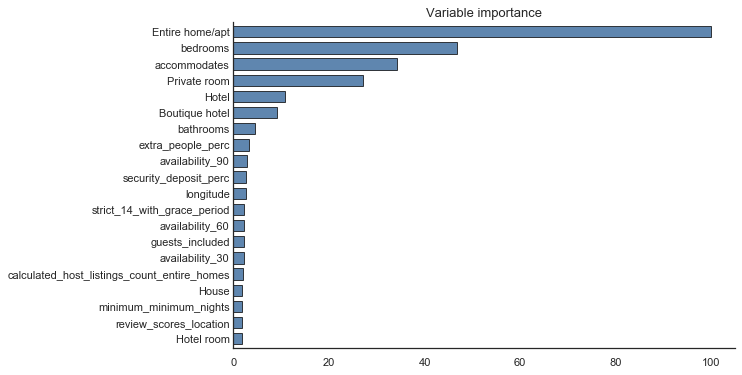

In [79]:
from statlearning import plot_feature_importance
plot_feature_importance(xbst, labels=X_train.columns)
plt.show()

## Lightgbm

In [80]:
import lightgbm as lgb

lgb = lgb.LGBMRegressor(objective='regression')
lgb_data = lgb.fit(X_train, yj_y_train)
lgb.fit(X_train, yj_y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [81]:
score = cv_rmse(lgb)
print("LGBoost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

LGBoost: 0.4961 (0.0177)


In [82]:
%%time

model = lgb

tuning_parameters = {
    'learning_rate': [0.1],
    'n_estimators' : [200],
    'num_leaves' : [22],
    'subsample' : [0.2],
}


lbst = GridSearchCV(model, tuning_parameters, cv = 5, n_jobs=4)
lbst_full_data = lbst.fit(X_train, list(yj_y_train))
lbst.fit(X_train, yj_y_train)

print('Best parameters found by grid search:', lbst.best_params_, '\n')

Best parameters found by grid search: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 22, 'subsample': 0.2} 

Wall time: 8.55 s


In [83]:
score = cv_rmse(lbst)
print("LGBoost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

LGBoost: 0.4932 (0.0173)


## Model ensemble

In [96]:
# Cross validator
kf=KFold(12, shuffle=True, random_state=1) 

# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=22,
                       learning_rate=0.1, 
                       n_estimators=200,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       subsample=0.2,
                       random_state=1)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.1,
                       n_estimators=250,
                       max_depth=5,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.8,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=1)


# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200,
                                learning_rate=0.1,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=4,
                                min_samples_split=8,
                                loss='huber',
                                random_state=1)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200,
                          max_depth=16,
                          min_samples_split=8,
                          min_samples_leaf=4,
                          max_features=None,
                          oob_score=True,
                          random_state=1)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, gbr,svr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [97]:
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(yj_y_train))

[07:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

## Cross validation results

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Cross validator
kf=KFold(12, shuffle=True, random_state=1) 

# Methods
columns = ['CV RMSE']
rows = ['OLS', 'Random forest', 'XGBoost','Lightgbm','Model ensemble']

regressions = [ols, regr, xbst, lbst, stack_gen]
results = pd.DataFrame(0.0, columns=columns, index=rows) # initialising a dataframe to hold the results

methods = {k: v for k, v in zip(rows, regressions)}

# Computing the results (Scikit Learn objects)
keys = ['OLS', 'Random forest', 'XGBoost', 'Lightgbm','Model ensemble']
for key in keys:
    scores = cross_val_score(methods[key], np.array(X_train), np.ravel(yj_y_train), cv=kf, scoring = 'neg_mean_squared_error')
    results.loc[key] = np.sqrt(-1*np.mean(scores))
    
results.round(4)

[07:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

,CV RMSE
OLS,0.5758
Random forest,0.5260
XGBoost,0.4941
Lightgbm,0.4935
Model ensemble,0.4924


## Weighted meta model

In [99]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))

SVR: 0.5531 (0.0184)


In [87]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))

gbr: 0.5087 (0.0163)


In [100]:
print('Svr')
svr_model_full_data = svr.fit(X_train, yj_y_train)

Svr


In [88]:
print('GradientBoosting')
gbr_full_data = gbr.fit(X_train, yj_y_train)

GradientBoosting


In [127]:
def meta_predictions(X):
    return ((0.2 * lbst_full_data.predict(X)) + \
            (0.25 * xbst_full_data.predict(X)) + \
            (0.1 * gbr_full_data.predict(X)) + \
            (0.05* rf_full_data.predict(X)) + \
            (0.4 * stack_gen_model.predict(np.array(X))))

In [128]:
# Get final precitions from the Weighted meta model
meta_score = np.sqrt(mean_squared_error(np.array(yj_y_train), meta_predictions(X_train)))
scores = (meta_score, 0)
print('RMSE score on train data:')
print(meta_score)

RMSE score on train data:
0.37331304542922744


# Submit prediction

In [91]:
# Read in sample_submission dataframe
submission = pd.read_csv("sampleSubmission.csv")
submission.shape

(24818, 2)

In [92]:
X_test = X_test.drop('id', axis= 1)

In [122]:
yj_y_pred = meta_predictions(X_test)
y_pred = yeoj.inverse_transform(yj_y_pred.reshape(-1,1))

In [123]:
submission = pd.DataFrame(y_pred, index=X_test.index, columns=[response])
submission.head()

,price
0,209.750920
1,453.105050
2,161.246113
3,77.622467
4,72.406045


In [124]:
submission.to_csv('Submission15.csv')